# Package Download

In [1]:
list.of.packages <- c("devtools", "gplots")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)){
    install.packages(new.packages,
        repos="https://cloud.r-project.org/", type="source")
}
devtools::install_github("vqv/ggbiplot")

Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation



# Package Loading

In [2]:
library("gplots")
library("ggbiplot")


 次のパッケージを付け加えます: ‘gplots’ 


 以下のオブジェクトは ‘package:stats’ からマスクされています:

    lowess


 要求されたパッケージ ggplot2 をロード中です 

 要求されたパッケージ plyr をロード中です 

 要求されたパッケージ scales をロード中です 

 要求されたパッケージ grid をロード中です 



# Data Preprocessing

In [3]:
nests <- rbind(
	c(5, 36, 7.6, 0, 0, 0), # DIF071
	c(5.6, 78, 0, 6.7, 57, 10.2), # DIF077
	c(5.6, 74, 2.2, 9.355, 0, 0), # DIF070
	c(23.2, 51, 0, 4.55, 105, 15.1), # DIF065
	c(4.8, 42, 5.5, 9.5, 120, 28.4), # DIF081
	c(7.62, 90, 0, 0, 17, 18.1), # DIF013
	c(17.78, 14, 43, 8.55, 95, 0), # DIF012
	c(1.27, 90, 7, 0, 55, 9.6), # DIF017
	c(11.43, 58, 0, 6.85, 79, 17),# DIF039
	c(15.24, 22, 0, 5.9, 195, 17), # DIF038
	c(15.24, 89, 0, 7.2, 80, 12), # DIF024
	c(10.16, 77, 0, 0, 29, 10)) # DIF028

rownames(nests) <- c(
	"DIF071_pre", "DIF077_pre", "DIF070_pre", "DIF065_pre", # Pre-monsoon
	"DIF081_mon", "DIF013_mon", "DIF012_mon", "DIF017_mon", # Monsoon
	"DIF039_pos", "DIF038_pos", "DIF024_pos", "DIF028_pos") # Post-monsoon

colnames(nests) <- c("Te", "Angle", "Ts", "ChamberDepth", "ChamberVolume", "Depth")

label <- c(rep("Pre-monsoon", 4), rep("Monsoon", 4), rep("Post-monsoon", 4))

# Baloon plot

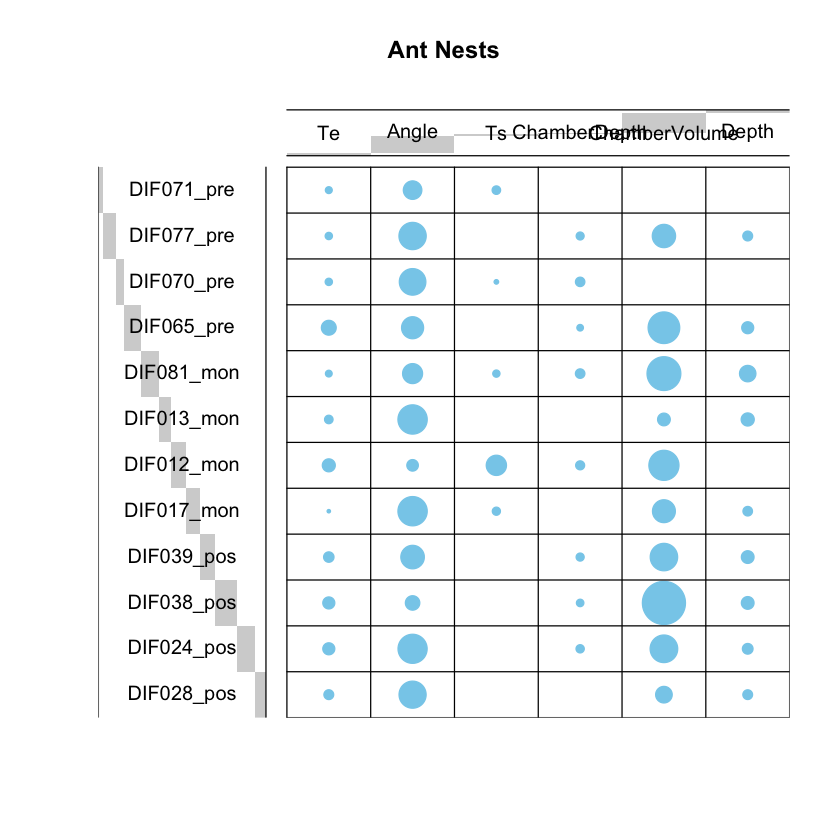

In [4]:
balloonplot(t(as.table(nests)), main ="Ant Nests", xlab ="", ylab="",
            label = FALSE, show.margins = FALSE)

# PCA w/o scaling

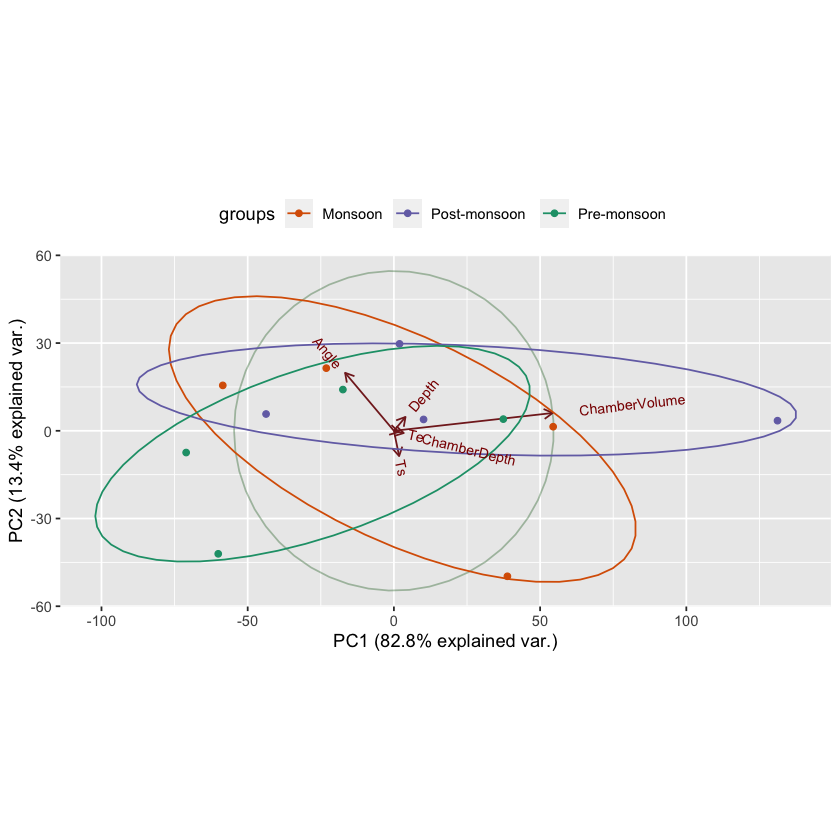

In [5]:
res1 <- prcomp(nests, center=TRUE, scale=FALSE)

ggbiplot(pcobj = res1, choices = 1:2, obs.scale = 1, var.scale = 1,
         groups = label, ellipse = TRUE, circle = TRUE) +
  scale_colour_manual(values = c("#D95F02", "#7570B3", "#1B9E77")) +
  theme(legend.direction = "horizontal", legend.position = "top")

# PCA w/ scaling

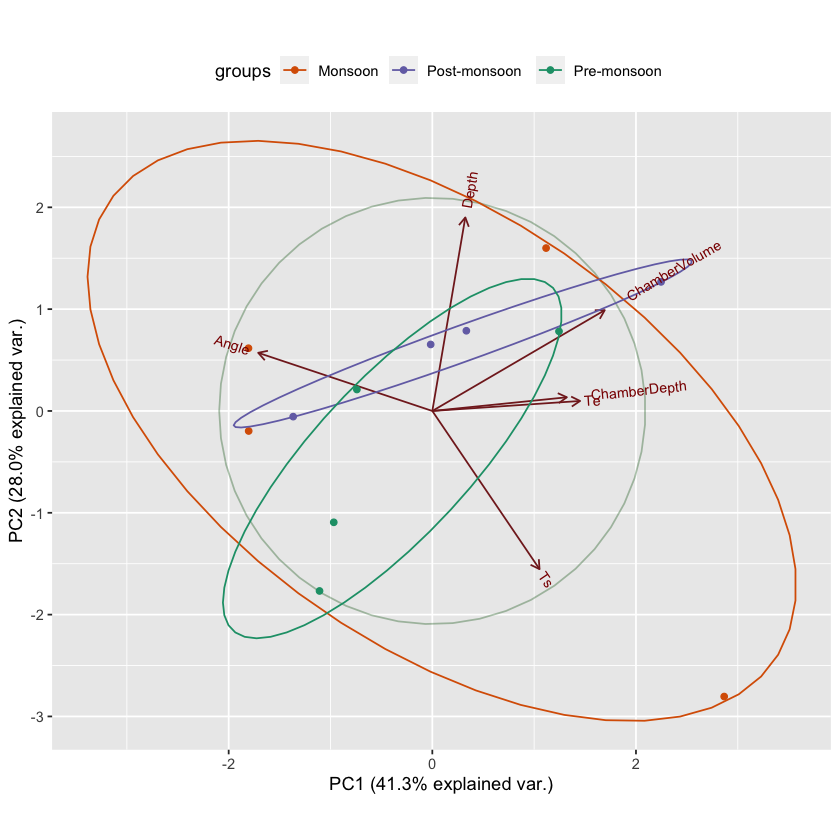

In [6]:
res2 <- prcomp(nests, center=TRUE, scale=TRUE)

ggbiplot(pcobj = res2, choices = 1:2, obs.scale = 1, var.scale = 1,
         groups = label, ellipse = TRUE, circle = TRUE) +
  scale_colour_manual(values = c("#D95F02", "#7570B3", "#1B9E77")) +
  theme(legend.direction = "horizontal", legend.position = "top")

# PCA w/o scaling + log transformation

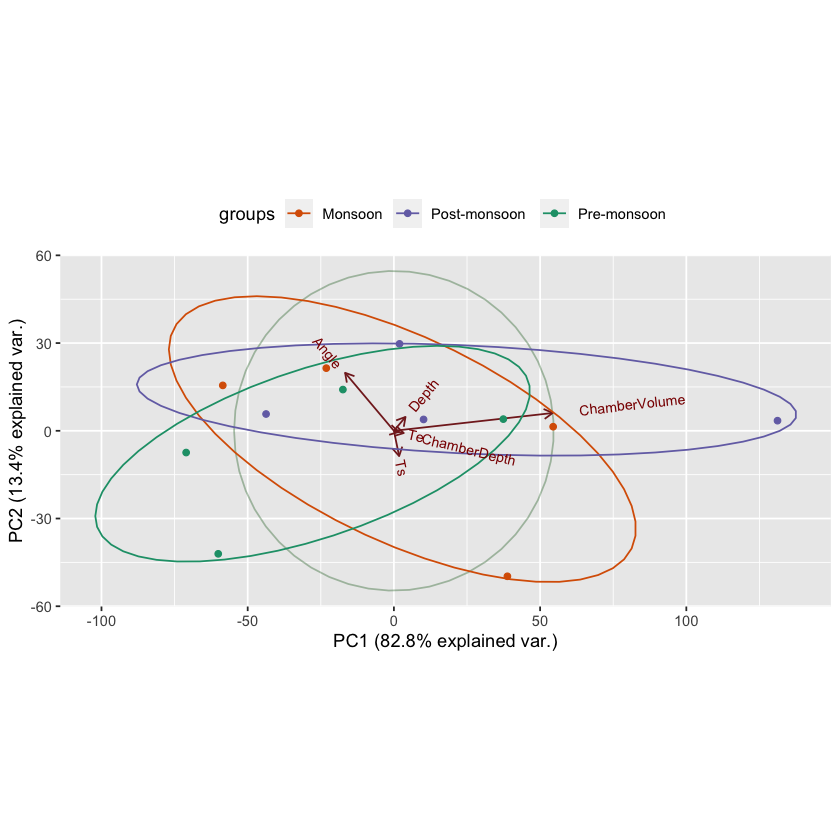

In [7]:
res3 <- prcomp(log10(nests+1), center=TRUE, scale=FALSE)

ggbiplot(pcobj = res1, choices = 1:2, obs.scale = 1, var.scale = 1,
         groups = label, ellipse = TRUE, circle = TRUE) +
  scale_colour_manual(values = c("#D95F02", "#7570B3", "#1B9E77")) +
  theme(legend.direction = "horizontal", legend.position = "top")

# PCA w/ scaling + log transformation

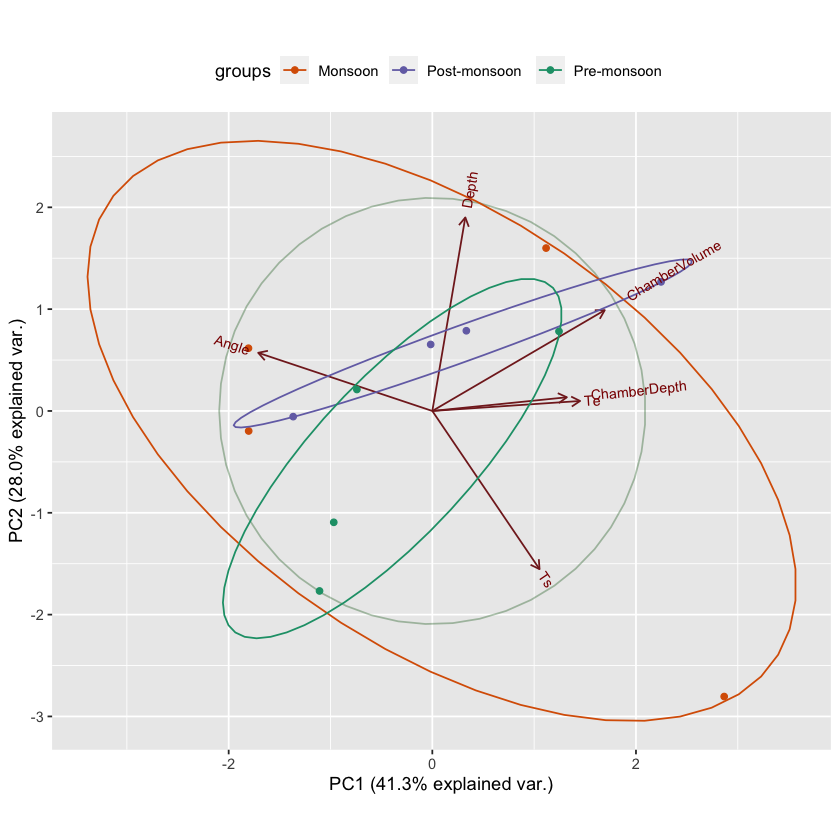

In [8]:
res4 <- prcomp(log10(nests+1), center=TRUE, scale=TRUE)

ggbiplot(pcobj = res2, choices = 1:2, obs.scale = 1, var.scale = 1,
         groups = label, ellipse = TRUE, circle = TRUE) +
  scale_colour_manual(values = c("#D95F02", "#7570B3", "#1B9E77")) +
  theme(legend.direction = "horizontal", legend.position = "top")

# Session Information

In [9]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] ggbiplot_0.55 scales_1.2.0  plyr_1.8.7    ggplot2_3.3.6 gplots_3.1.3 

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.9         prettyunits_1.1.1  ps_1.7.1           gtools_3.9.3      
 [5] digest_0.6.29      utf8_1.2.2         mime_0.12          IRdisplay_1.1     
 [9] R6_2.5.1           repr_1.1.4         evaluate_0.15      pillar_1.8.0      
[13] rlang_1.0.4        curl_4.3.2         uuid_1.1-0         miniUI_0.1.1.1    
[17] callr_3.7.1        urlchecker_1.0.1   labeling_0.4.2     devtools_2.4.4    
[21] 